In [1]:
#import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Data Wrangling<a id='2.3_Imports'></a>

In [2]:
#load data
df = pd.read_csv('CC General.csv')

In [3]:
df.shape

(8950, 18)

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
#customer ID is unique for each customer and it won't help with clustering so removed
df.drop('CUST_ID', axis = 1, inplace=True)

In [7]:
#MISSING VALUES 
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#Credit_Limit has 1 null value so we can drop it
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [9]:
#For 313 null values of Minimum_payments we are going to replace the values with Median because median gives a better estimate of the central tendency of this feature
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [10]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Exploratory Data Analysis & Preprocessing

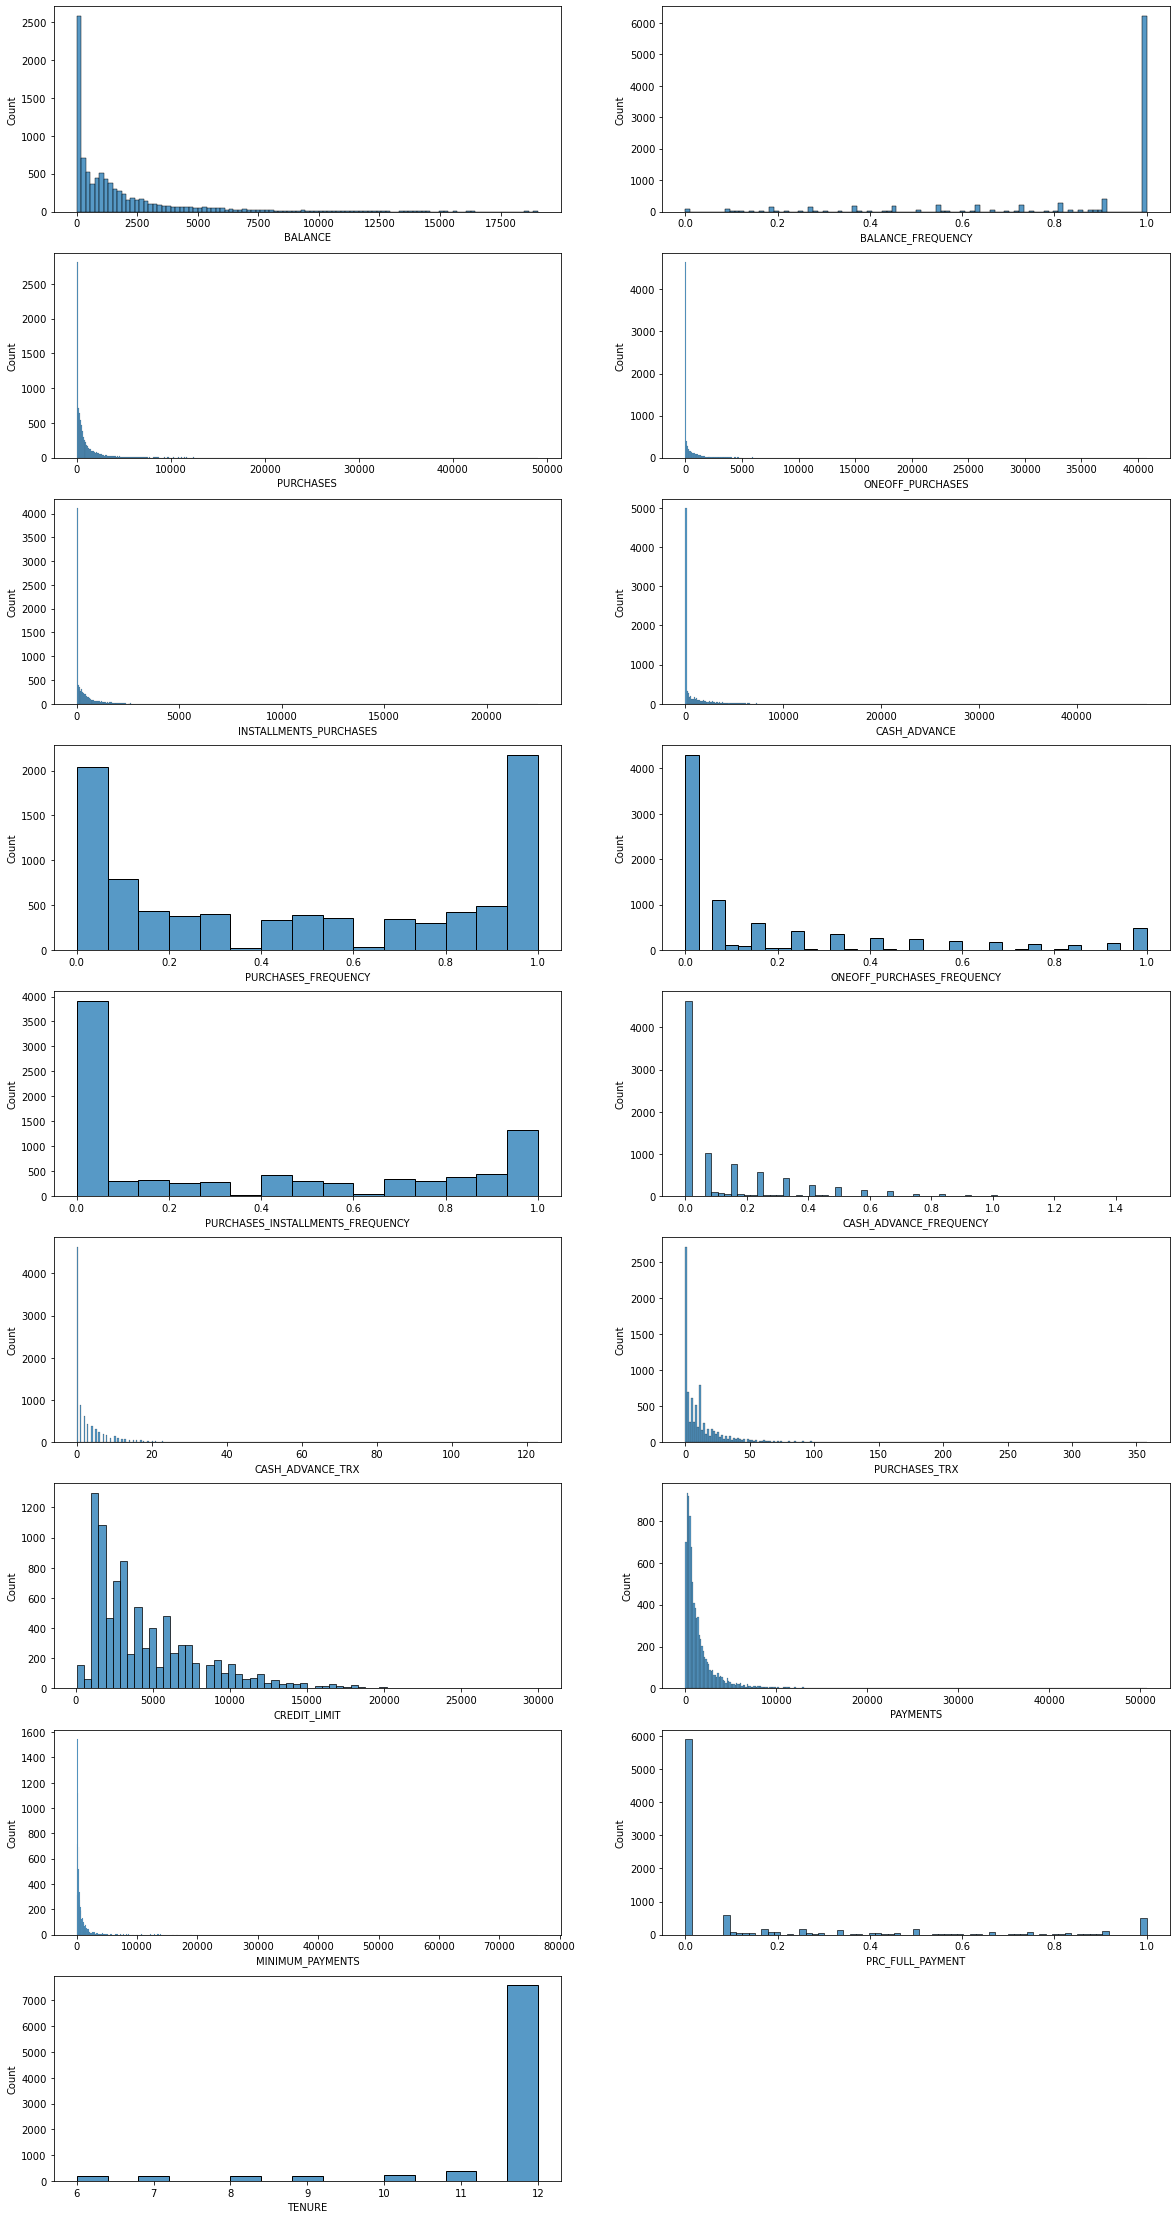

In [11]:
#visualize skewness of the dataset
plt.figure(figsize = (20,40))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9,2,i+1)
        sns.histplot(df[col], ax = ax)
        plt.xlabel(col)
plt.show()
#the dataset is heavily skewed because there are some customers who do very high amount of transactions.
#skewness - anamoly detection and not handle the skewness OR figure out a way to better group the outliers for a better fitted model

In [12]:
#do want to normalize the data, Clustering - measure distance b/w points - if different cols are in different scales
#calculate range/scope, in sklearn (max-min scalar)
#PCA (linear reduction - we lose information) followed by k-means clustering  
#(t-SNE nonlinear not deterministic but scholastic/random so different numbers each time, isomap)

In [13]:
#reducing right skewness - logs , should i use different method for left skewness? 
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [14]:
for col in cols:
    df[col] = np.log(1 + df[col])

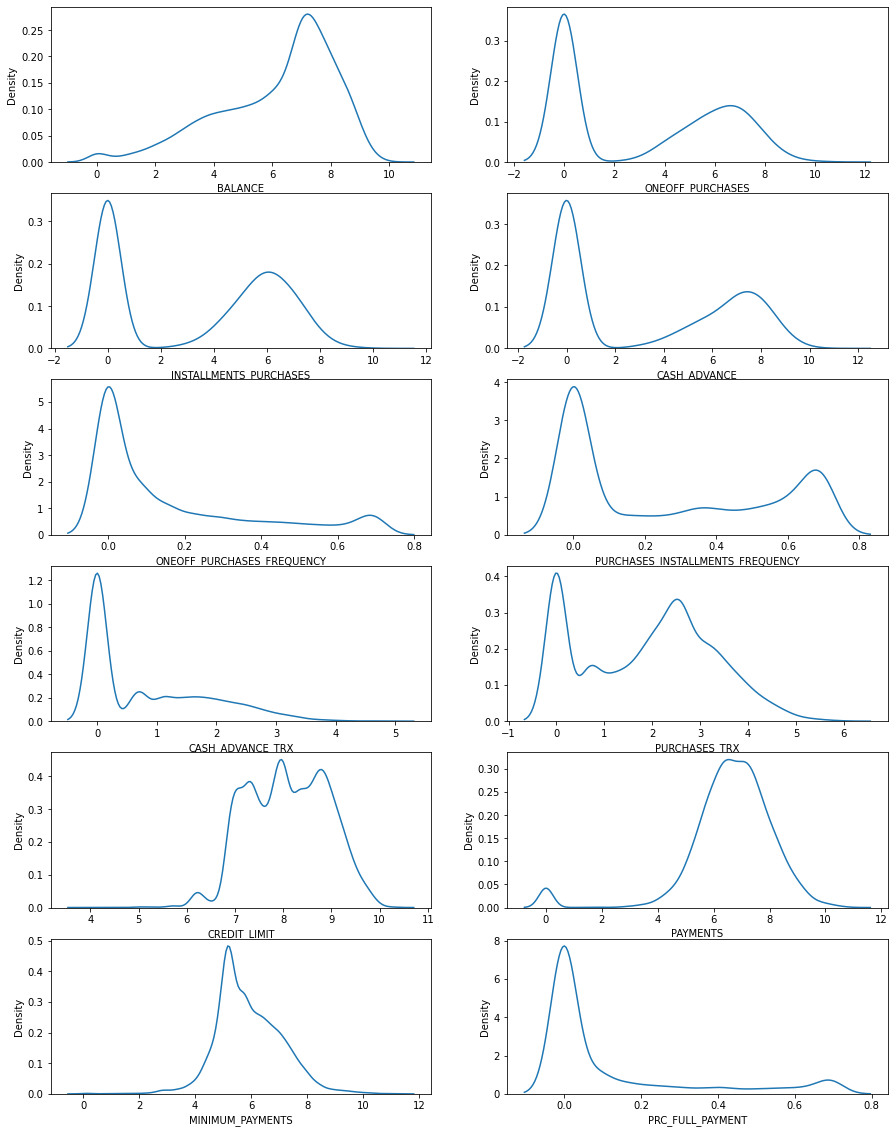

In [15]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

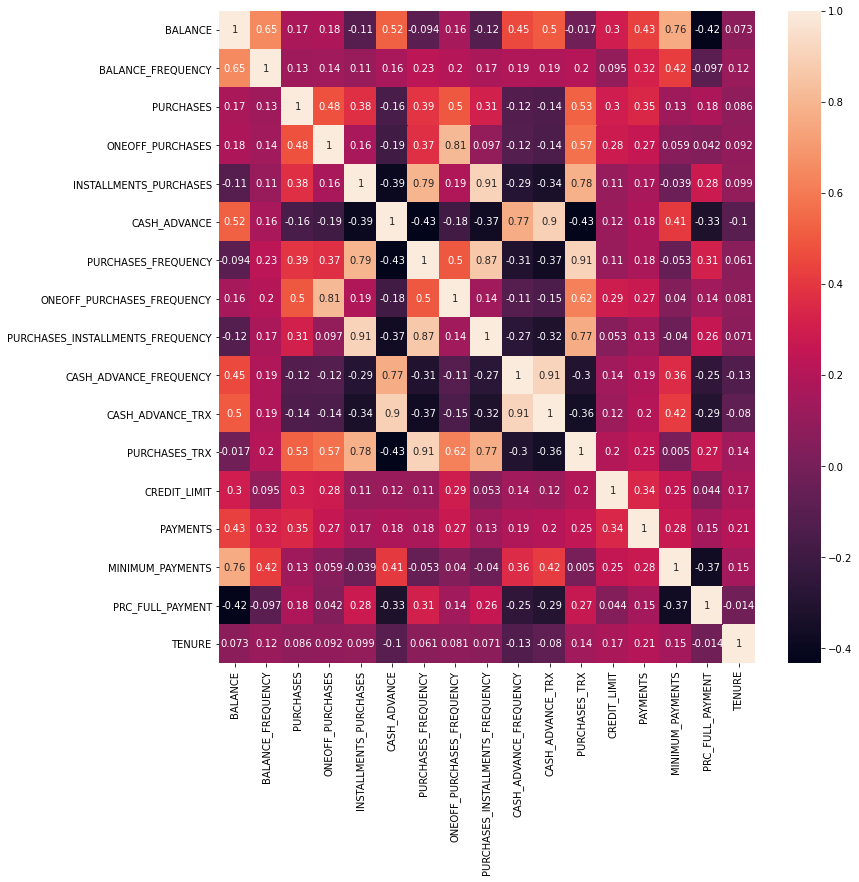

In [16]:
#look at correlation b/w the cols to analyze correlated features 
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Modeling

In [17]:
#need to do PCA,  We will select the number of components such that our data in the lower dimensions explains 95% of variance of our original data.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2]
print('Explained variation per principal component: {}'.format(
    pca.explained_variance_ratio_))

Explained variation per principal component: [9.99990954e-01 3.88687979e-06 1.88389382e-06]


In [18]:
#TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd_result = svd.fit_transform(df)
print("Explained variation per principal component: \n {}".format(
    svd.explained_variance_ratio_))
print("Total Explained variation by the first {} components: \n{}".format(
    3, svd.explained_variance_ratio_.sum()))

Explained variation per principal component: 
 [9.96978722e-01 3.01387023e-03 3.88680921e-06]
Total Explained variation by the first 3 components: 
0.9999964789657622


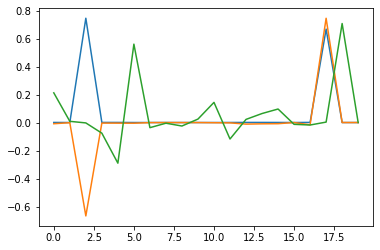

In [19]:
plt.plot(svd.components_[0, :])
plt.plot(svd.components_[1, :])
plt.plot(svd.components_[2, :])

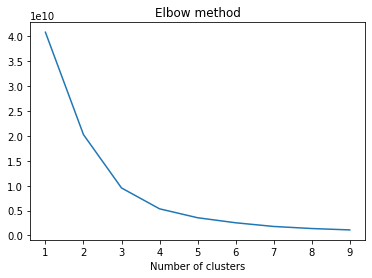

In [21]:
#start K-means clustering
#know need to know number of clusters n. Thus it is necessary to initalize n to its appropriate value.
from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(pca_result) for k in range (1,10)]
innertia = [model.inertia_ for model in kmeans_models]
#plot elbow curve 
plt.plot(range(1,10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.show()

In [23]:
#another way to see which cluster number between 3 or 4 is more appropriate

from sklearn.metrics import silhouette_score
silhoutte_scores = [silhouette_score(pca_result, model.labels_) for model in kmeans_models[2:4]]
print('Silhoutte score of three clusters ', silhoutte_scores[0])
print('Silhoutte score of four clusters ', silhoutte_scores[1])

Silhoutte score of three clusters  0.7983774344801144
Silhoutte score of four clusters  0.7363577916417212


In [24]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(pca_result)

KMeans(n_clusters=3, random_state=23)

In [25]:
df['cluster_id'] = kmeans.labels_

In [26]:
for col in cols:
    df[col] = np.exp(df[col])

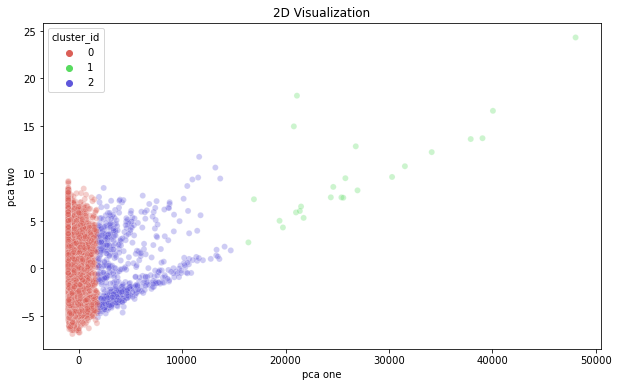

In [30]:
#How to choose the right features to compare - based it on correlation 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x= 'pca-one', y= 'pca-two', hue='cluster_id', legend="full", palette=sns.color_palette("hls", 3), alpha=0.3)
plt.title('2D Visualization')
plt.xlabel('pca one')
plt.ylabel('pca two')
plt.show()

In [31]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(svd_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8949 samples in 0.012s...
[t-SNE] Computed neighbors for 8949 samples in 0.205s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8949
[t-SNE] Computed conditional probabilities for sample 2000 / 8949
[t-SNE] Computed conditional probabilities for sample 3000 / 8949
[t-SNE] Computed conditional probabilities for sample 4000 / 8949
[t-SNE] Computed conditional probabilities for sample 5000 / 8949
[t-SNE] Computed conditional probabilities for sample 6000 / 8949
[t-SNE] Computed conditional probabilities for sample 7000 / 8949
[t-SNE] Computed conditional probabilities for sample 8000 / 8949
[t-SNE] Computed conditional probabilities for sample 8949 / 8949
[t-SNE] Mean sigma: 0.122500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.445610
[t-SNE] KL divergence after 300 iterations: 1.299337
t-SNE done! Time elapsed: 38.36847734451294 seconds


<AxesSubplot:xlabel='tsne-pca-one', ylabel='tsne-pca-two'>

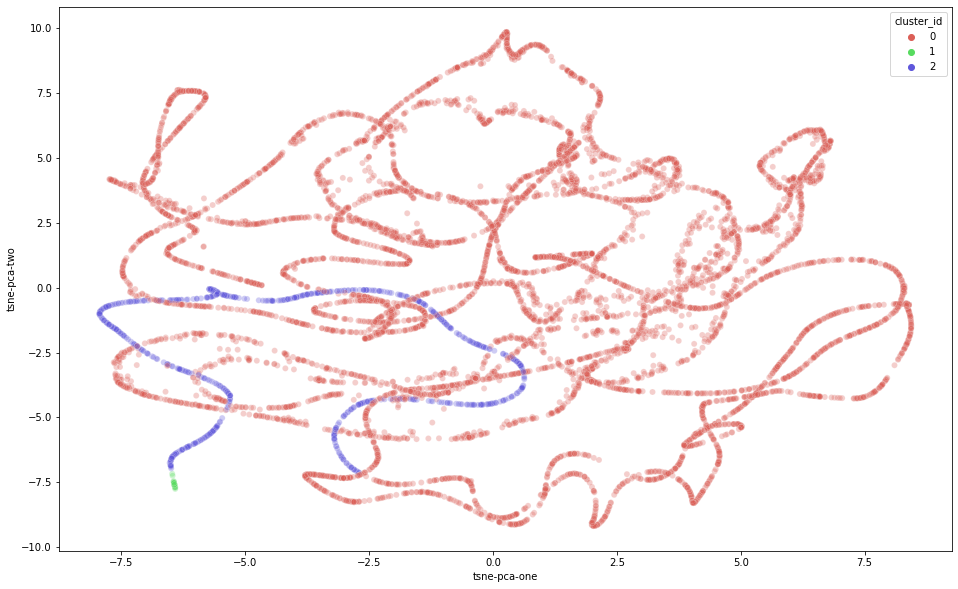

In [33]:
df['tsne-pca-one'] = tsne_results[:,0]
df['tsne-pca-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-pca-one", y="tsne-pca-two",
    hue="cluster_id",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne-pca-one', ylabel='tsne-pca-two'>

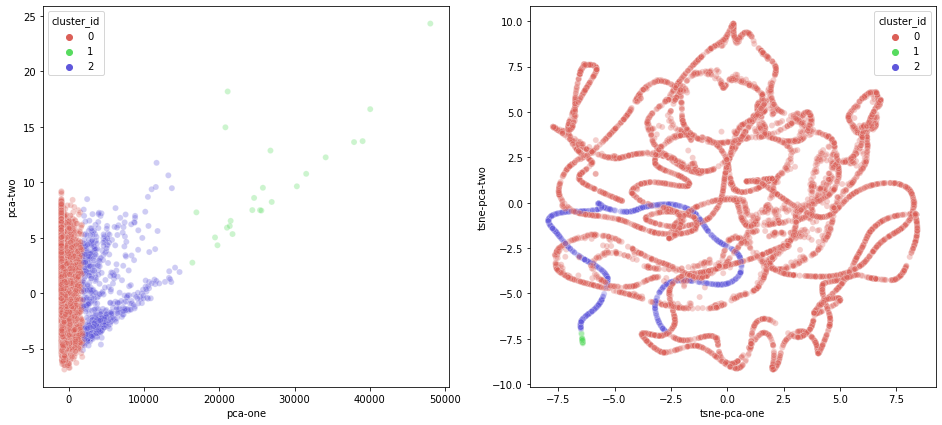

In [35]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="cluster_id",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca-one", y="tsne-pca-two",
    hue="cluster_id",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax2
)